<a href="https://colab.research.google.com/github/tantiboro/vaki/blob/main/kiva_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Nov  5 11:28:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/New Folder/loans_lenders.csv')

In [ ]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/New Folder/loans.csv')

In [ ]:
# How many columns and rows are they in the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 2086700 rows and 34 columns.


In [ ]:
print(f'The columns of the dataset are: {df.columns.to_list()}')

The columns of the dataset are: ['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION', 'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS', 'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE', 'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID', 'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME', 'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES', 'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL']


In [ ]:
# How many NaN are in the dataframe
df.isnull().sum()

LOAN_ID                                  0
LOAN_NAME                            50238
ORIGINAL_LANGUAGE                    45891
DESCRIPTION                          45926
DESCRIPTION_TRANSLATED              455312
FUNDED_AMOUNT                            0
LOAN_AMOUNT                              0
STATUS                                   0
IMAGE_ID                             45891
VIDEO_ID                           2085522
ACTIVITY_NAME                            0
SECTOR_NAME                              0
LOAN_USE                             45914
COUNTRY_CODE                            34
COUNTRY_NAME                             0
TOWN_NAME                           176345
CURRENCY_POLICY                          0
CURRENCY_EXCHANGE_COVERAGE_RATE     473453
CURRENCY                                 0
PARTNER_ID                           21173
POSTED_TIME                              0
PLANNED_EXPIRATION_TIME             371834
DISBURSE_TIME                         4013
RAISED_TIME

In [ ]:
# Dropping columns with more than 100k missing values and only informative data
df1 = df.drop(columns = ['LOAN_ID', 'DESCRIPTION', 'COUNTRY_CODE','VIDEO_ID', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'TOWN_NAME', 'PLANNED_EXPIRATION_TIME', 'RAISED_TIME', 'TAGS', 'IMAGE_ID', 'PARTNER_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'BORROWER_NAMES', 'BORROWER_PICTURED', 'DISBURSE_TIME'], axis=1)

In [ ]:
#df1.isnull().sum()

In [ ]:
df2 = df1.dropna()

In [ ]:
df2['STATUS'].value_counts()

funded         1537208
expired          86606
fundRaising       7564
Name: STATUS, dtype: int64

In [ ]:
print(f'The dataset has {df2.shape[0]} rows and {df2.shape[1]} columns.')

The dataset has 1631378 rows and 18 columns.


In [ ]:
#df2.isnull().sum()

In [ ]:
#Check the status of all the loans
df2['STATUS'].value_counts()

funded         1537208
expired          86606
fundRaising       7564
Name: STATUS, dtype: int64

In [ ]:
# Drop the loans that are still on fundraising stage
data = df2.loc[df1['STATUS'] != 'fundRaising']
data.head(1)

,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_NAME,CURRENCY_POLICY,CURRENCY,POSTED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,BORROWER_GENDERS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
1,"Rosa works hard to support her family. Rosa is married and has a general store business in the Philippines.<br /><br />Rosa requested a PHP 5,000 loan through NWTF to buy more groceries to sell in her general store.<br /><br />Rosa has been in this business for 10 years now.<br /><br />Rosa would like to save enough to provide a secure future for her family.",125.0,125.0,funded,General Store,Retail,to buy more groceries to sell in her general store,Philippines,shared,PHP,2015-08-16 14:03:48.000 +0000,8.0,5,1,1,female,monthly,field_partner


In [ ]:
# Checking again the status of the remaining loans
data['STATUS'].value_counts()

funded     1537208
expired      86606
Name: STATUS, dtype: int64

In [ ]:
print(data.dtypes)

DESCRIPTION_TRANSLATED     object
FUNDED_AMOUNT             float64
LOAN_AMOUNT               float64
STATUS                     object
ACTIVITY_NAME              object
SECTOR_NAME                object
LOAN_USE                   object
COUNTRY_NAME               object
CURRENCY_POLICY            object
CURRENCY                   object
POSTED_TIME                object
LENDER_TERM               float64
NUM_LENDERS_TOTAL           int64
NUM_JOURNAL_ENTRIES         int64
NUM_BULK_ENTRIES            int64
BORROWER_GENDERS           object
REPAYMENT_INTERVAL         object
DISTRIBUTION_MODEL         object
dtype: object


In [ ]:
data.columns = [i.replace(' ', '_').lower() for i in data.columns]

In [ ]:
print(f'The dataset has the following colums: {data.columns.to_list()}.')

The dataset has the following colums: ['description_translated', 'funded_amount', 'loan_amount', 'status', 'activity_name', 'sector_name', 'loan_use', 'country_name', 'currency_policy', 'currency', 'posted_time', 'lender_term', 'num_lenders_total', 'num_journal_entries', 'num_bulk_entries', 'borrower_genders', 'repayment_interval', 'distribution_model'].


In [ ]:
dat = data.copy()
dat['status'].value_counts()

funded     1537208
expired      86606
Name: status, dtype: int64

In [ ]:
dat.head(1)

,description_translated,funded_amount,loan_amount,status,activity_name,sector_name,loan_use,country_name,currency_policy,currency,posted_time,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries,borrower_genders,repayment_interval,distribution_model
1,"Rosa works hard to support her family. Rosa is married and has a general store business in the Philippines.<br /><br />Rosa requested a PHP 5,000 loan through NWTF to buy more groceries to sell in her general store.<br /><br />Rosa has been in this business for 10 years now.<br /><br />Rosa would like to save enough to provide a secure future for her family.",125.0,125.0,funded,General Store,Retail,to buy more groceries to sell in her general store,Philippines,shared,PHP,2015-08-16 14:03:48.000 +0000,8.0,5,1,1,female,monthly,field_partner


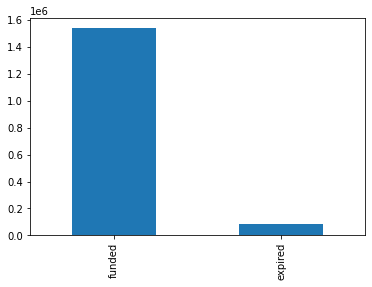

In [ ]:
dat['status'].value_counts().plot(kind='bar')

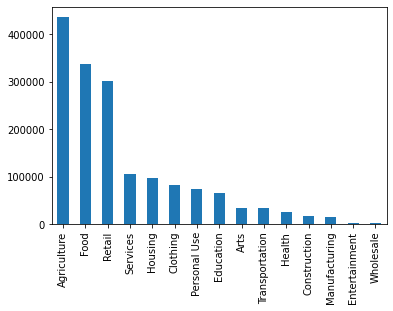

In [ ]:
dat['sector_name'].value_counts().plot(kind='bar')

In [ ]:
#dat.loc[dat['status'] == 'funded', 'posted_time'].apply(lambda v: v.year).unique()

In [ ]:
dat[['loan_amount', 'sector_name', 'status']].groupby(['sector_name', 'status']).count()

loan_amount
sector_name    status              
Agriculture    expired        24015
               funded        412565
Arts           expired          273
               funded         33126
Clothing       expired         5427
               funded         76251
Construction   expired          741
               funded         16466
Education      expired          978
               funded         64980
Entertainment  expired          171
               funded          1668
Food           expired        15304
               funded        322141
Health         expired         1836
               funded         24142
Housing        expired         6077
               funded         90198
Manufacturing  expired           32
               funded         14109
Personal Use   expired         2019
               funded         71139
Retail         expired        19139
               funded        281654
Services       expired         7019
               funded         97925
Transportation expired         3520
               funded         29435
Wholesale      expired           55
               funded          1409

In [ ]:
bins = np.array([0, 200, 400, 600, 1000, 100000, 500000])

In [ ]:
labels = pd.cut(dat.loan_amount, bins)

In [ ]:
labels

1                (0, 200]
2                (0, 200]
3          (1000, 100000]
4              (400, 600]
5              (200, 400]
                ...      
2086695        (400, 600]
2086696          (0, 200]
2086697        (400, 600]
2086698    (1000, 100000]
2086699    (1000, 100000]
Name: loan_amount, Length: 1623814, dtype: category
Categories (6, interval[int64]): [(0, 200] < (200, 400] < (400, 600] < (600, 1000] <
                                  (1000, 100000] < (100000, 500000]]

In [ ]:
grouped = dat.groupby(['status', labels])

In [ ]:
grouped.size().unstack()

loan_amount,"(0, 200]","(200, 400]","(400, 600]","(600, 1000]","(1000, 100000]","(100000, 500000]"
status,,,,,,
expired,86,5439,13018,26046,42017,0
funded,282320,402571,274334,273489,304466,28


In [ ]:
dat.groupby('status').mean()

,funded_amount,loan_amount,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries
status,,,,,,
expired,587.280558,1419.374812,18.185437,15.439150,1.014064,1.000820
funded,796.813200,796.813346,12.980549,21.304216,1.504796,1.134655


In [ ]:
dat['loan_amount_higher'] = np.where(dat['funded_amount'] >= dat['loan_amount'], 
                                           'yes', 'no')
dat['loan_amount_higher'].value_counts()

yes    1537211
no       86603
Name: loan_amount_higher, dtype: int64

In [ ]:
learning_data = dat[['loan_amount', 'loan_use', 'sector_name', 'status']]
learning_data['status'] = dat.apply(lambda x: 1 if x.status == 'funded' else 0, axis=1)

learning_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,loan_amount,loan_use,sector_name,status
1,125.0,to buy more groceries to sell in her general store,Retail,1
2,175.0,to buy more bananas to sell and other supplies needed in her business.,Food,1
3,1400.0,"to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake.",Agriculture,1
4,425.0,"to increase her stock of various brands of beer: 33 Export, Mutzig, Amstel, etc",Food,1
5,325.0,to buy fertilizers and seeds to get a good yield and grow his farming business.,Agriculture,1


In [ ]:
cat_data = dat[['sector_name']]
cat_data.nunique()

sector_name    15
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_data_1hot = cat_encoder.fit_transform(cat_data)
cat_data_1hot

<1623814x15 sparse matrix of type '<class 'numpy.float64'>'
	with 1623814 stored elements in Compressed Sparse Row format>

In [ ]:
cat_data_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df3 = pd.DataFrame(cat_data_1hot.toarray())
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df3.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
dtype: object

In [ ]:
newdf = pd.concat([learning_data[['loan_amount', 'status']].reset_index(drop=True), df3], axis=1)
newdf.head()

,loan_amount,status,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,125.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,175.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1400.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,425.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,325.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#newdf['status'].value_counts()

In [ ]:
target = newdf['status']
data_features = newdf.drop('status', axis=1)

In [ ]:
# newdf['status' == 0]
# newdf['status' == 1]
# # print(target_0.value_counts())
# # print(target_1.value_counts())

In [ ]:
#Explore RandomForestClassifier on a holdout set

In [ ]:
#import the methods that will be needed to evaluate a basic model
#import Random Forest for Classification from sklearn
#Split the data into training and test set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data_features, target, test_size=0.3)

In [ ]:
#Define a function to run and evaluate the model
def rf_m(X_train, y_train, X_test):
  rf = RandomForestClassifier()
  rf_model = rf.fit(X_train, y_train)
  y_pred = rf_model.predict(X_test)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  print('Precision: {} / Recall: {}'.format(round(precision, 3), round(recall, 3)))
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  return y_pred 

In [ ]:
y_pred = rf_m(X_train, y_train, X_test)

Precision: 0.946 / Recall: 1.0
[[    70  26091]
 [   209 460775]]
              precision    recall  f1-score   support

           0       0.25      0.00      0.01     26161
           1       0.95      1.00      0.97    460984

    accuracy                           0.95    487145
   macro avg       0.60      0.50      0.49    487145
weighted avg       0.91      0.95      0.92    487145



In [ ]:
import joblib
# save
joblib.dump(rf_m, "my_random_forest.joblib")

# load
#loaded_rf = joblib.load("my_random_forest.joblib")

['my_random_forest.joblib']

In [ ]:
count_class_1, count_class_0 = newdf['status'].value_counts()


In [ ]:
df_class_0 = newdf[newdf['status'] == 0]
df_class_1 = newdf[newdf['status'] == 1]

In [ ]:
print(count_class_0)
print(count_class_1)

86606
1537208


In [ ]:
# Undersampling 1_class and concat the dataframe to for a new dataframe
df_class_1_under = df_class_1.sample(count_class_0)
df_class_1_under.shape
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
print ('Random under-Sampling')
print(df_test_under.status.value_counts())

Random under-Sampling
1    86606
0    86606
Name: status, dtype: int64


In [ ]:
X = df_test_under.drop(['status'], axis=1)
y = df_test_under['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
y_pred = rf_m(X_train, y_train, X_test)

Precision: 0.791 / Recall: 0.614
[[21771  4211]
 [10025 15957]]
              precision    recall  f1-score   support

           0       0.68      0.84      0.75     25982
           1       0.79      0.61      0.69     25982

    accuracy                           0.73     51964
   macro avg       0.74      0.73      0.72     51964
weighted avg       0.74      0.73      0.72     51964



Oversampling

In [ ]:
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_class_0_over.shape
df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)
print ('Random over-Sampling')
print(df_test_over.status.value_counts())

Random over-Sampling
1    1537208
0    1537208
Name: status, dtype: int64


In [ ]:
X = df_test_over.drop(['status'], axis=1)
y = df_test_over['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
y_pred = rf_m(X_train, y_train, X_test)

Precision: 0.814 / Recall: 0.61
[[396651  64512]
 [179689 281473]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.76    461163
           1       0.81      0.61      0.70    461162

    accuracy                           0.74    922325
   macro avg       0.75      0.74      0.73    922325
weighted avg       0.75      0.74      0.73    922325



Method 3: SMOTE

In [ ]:
newdf['status'].value_counts()

1    1537208
0      86606
Name: status, dtype: int64

In [ ]:
#!pip install imbalanced-learn
y = newdf['status']
X = newdf.drop('status', axis=1)


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data_feat, targ, test_size=0.3)
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_sample(X, y)
print('Resampled dataset shape %s' % Counter(y_sm))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({1: 1537208, 0: 1537208})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
y_pred = rf_m(X_train, y_train, X_test)

Precision: 0.817 / Recall: 0.617
[[265041  42401]
 [117602 189840]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.77    307442
           1       0.82      0.62      0.70    307442

    accuracy                           0.74    614884
   macro avg       0.76      0.74      0.74    614884
weighted avg       0.76      0.74      0.74    614884



In [ ]:
from sklearn.preprocessing import StandardScaler
#Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.6874210215601992
Testing Data Score: 0.6875979859615797


In [ ]:
y_pred = rf_m(X_train_scaled, y_train, X_test_scaled)

Precision: 0.817 / Recall: 0.617
[[265060  42382]
 [117599 189843]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.77    307442
           1       0.82      0.62      0.70    307442

    accuracy                           0.74    614884
   macro avg       0.76      0.74      0.74    614884
weighted avg       0.76      0.74      0.74    614884



In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
frequent_clf = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [ ]:
y_freq_pred = frequent_clf.predict(X_test)

In [ ]:
uniform_clf = DummyClassifier(strategy='uniform').fit(X_train, y_train)

In [ ]:
y_uniform_pred = uniform_clf.predict(X_test)

In [ ]:
print(frequent_clf.score(X_test, y_test))
print(uniform_clf.score(X_test, y_test))

0.5
0.4992583967057201


In [ ]:
# New Machine Learning data on how the loan use can affect the funding
loan_data = learning_data.dropna()
loan_data.isnull().sum()

loan_amount    0
loan_use       0
sector_name    0
status         0
dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', None)
loan_data[loan_data['loan_use'].apply(lambda x: x.isascii())]

,loan_amount,loan_use,sector_name,status
1,125.0,to buy more groceries to sell in her general store,Retail,1
2,175.0,to buy more bananas to sell and other supplies needed in her business.,Food,1
3,1400.0,"to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake.",Agriculture,1
4,425.0,"to increase her stock of various brands of beer: 33 Export, Mutzig, Amstel, etc",Food,1
5,325.0,to buy fertilizers and seeds to get a good yield and grow his farming business.,Agriculture,1
...,...,...,...,...
2086695,600.0,to process more mobile airtime credit transactions on weekends.,Retail,0
2086696,100.0,"to access premium seeds and high quality fertilizer for 0.5 acres of maize, in addition to advice and insurance, optimizing for increased productivity and profits",Agriculture,1
2086697,500.0,"to cultivate her 2.1 hectares of beans and 0.7 hectares of corn, and purchase the necessary inputs.",Agriculture,1
2086698,1350.0,to purchase a solar light and gain access to cost efficient hybrid seeds and fertilizer for maize cultivation.\t\t\t\t\t\t\t,Agriculture,1


In [ ]:
loan_data.head()

,loan_amount,loan_use,sector_name,status
1,125.0,to buy more groceries to sell in her general store,Retail,1
2,175.0,to buy more bananas to sell and other supplies needed in her business.,Food,1
3,1400.0,"to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake.",Agriculture,1
4,425.0,"to increase her stock of various brands of beer: 33 Export, Mutzig, Amstel, etc",Food,1
5,325.0,to buy fertilizers and seeds to get a good yield and grow his farming business.,Agriculture,1


In [ ]:
loan_data.tail()

,loan_amount,loan_use,sector_name,status
2086695,600.0,to process more mobile airtime credit transactions on weekends.,Retail,0
2086696,100.0,"to access premium seeds and high quality fertilizer for 0.5 acres of maize, in addition to advice and insurance, optimizing for increased productivity and profits",Agriculture,1
2086697,500.0,"to cultivate her 2.1 hectares of beans and 0.7 hectares of corn, and purchase the necessary inputs.",Agriculture,1
2086698,1350.0,to purchase a solar light and gain access to cost efficient hybrid seeds and fertilizer for maize cultivation.\t\t\t\t\t\t\t,Agriculture,1
2086699,5000.0,fill our showroom with great buys that incoming college kids will love to purchase.,Retail,0


RNN:Implement a basic RNN

Read in, Clean and split the data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 1000)

In [ ]:
#Read the data in
data_df = learning_data.drop(columns=['sector_name'])
features = data_df['loan_use']
labels = data_df['status']
labels.value_counts()

1    1537208
0      86606
Name: status, dtype: int64

In [ ]:
#Spliting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [ ]:
# # Install Keras
# !pip install -U keras==2.6.0

In [ ]:
# Import the tools needed for keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using Tensorflow backend

In [ ]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
#Use that tokenizer to transform the data in the training 
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_seq[0]

[1, 3, 147, 125, 37, 2, 92]

In [ ]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [ ]:
X_train_seq_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,   3, 147, 125,  37,   2,  92], dtype=int32)

Building the model


In [ ]:
# Import the tools needed for keras and define the functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  recall = true_positives / (predicted_positives + K.epsilon())
  return recall


In [ ]:
#Construct a RNN model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          1092992   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,102,401
Trainable params: 1,102,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [ ]:
history = model.fit(X_train_seq_padded, y_train,
                    batch_size=32, epochs=5,
                    validation_data=(X_test_seq_padded, y_test)) 

Epoch 1/5
35521/35521 [==============================] - 202s 6ms/step - loss: 0.1851 - accuracy: 0.9468 - precision_m: 0.9468 - recall_m: 1.0000 - val_loss: 0.1831 - val_accuracy: 0.9464 - val_precision_m: 0.9464 - val_recall_m: 1.0000
Epoch 2/5
35521/35521 [==============================] - 195s 5ms/step - loss: 0.1785 - accuracy: 0.9468 - precision_m: 0.9469 - recall_m: 0.9999 - val_loss: 0.1806 - val_accuracy: 0.9464 - val_precision_m: 0.9466 - val_recall_m: 0.9999
Epoch 3/5
35521/35521 [==============================] - 195s 6ms/step - loss: 0.1754 - accuracy: 0.9471 - precision_m: 0.9477 - recall_m: 0.9992 - val_loss: 0.1795 - val_accuracy: 0.9463 - val_precision_m: 0.9471 - val_recall_m: 0.9992
Epoch 4/5
35521/35521 [==============================] - 195s 5ms/step - loss: 0.1724 - accuracy: 0.9477 - precision_m: 0.9485 - recall_m: 0.9990 - val_loss: 0.1819 - val_accuracy: 0.9460 - val_precision_m: 0.9469 - val_recall_m: 0.9989
Epoch 5/5
35521/35521 [=============================

Clean up text


Lemmatize text

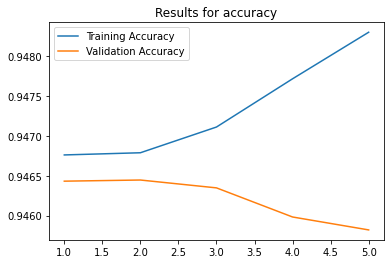

<Figure size 432x288 with 0 Axes>

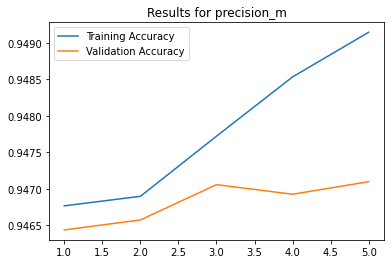

<Figure size 432x288 with 0 Axes>

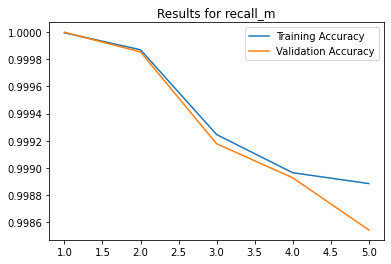

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()
    plt.savefig('fig_rnn1.png')

In [ ]:
count_class_1, count_class_0 = learning_data['status'].value_counts()

In [ ]:
df4_0 = learning_data[learning_data['status'] == 0].drop(columns=['loan_amount', 'sector_name'])
df4_1 = learning_data[learning_data['status'] == 1].drop(columns=['loan_amount', 'sector_name'])

In [ ]:
df4_0.head()

,loan_use,status
30,to purchase more variety of fish to sell,0
99,him to buy more fodder for his cattle.,0
119,to purchase a motor bike,0
170,"to buy clothes, jeans, blouses, watches, tennis shoes and a variety of accessories.",0
190,"to buy sweets, drinks, basic food staples, and some household items.",0


In [ ]:
print(count_class_0)
print(count_class_1)

86606
1537208


In [ ]:
# Undersampling 1_class and concat the dataframe to for a new dataframe
df4_1_under = df4_1.sample(count_class_0)
df4_1_under.shape
df4_test_under = pd.concat([df4_1_under, df4_0], axis=0)
print ('Random under-Sampling')
print(df4_test_under.status.value_counts())

Random under-Sampling
1    86606
0    86606
Name: status, dtype: int64


In [ ]:
df4_test_under.head()

,loan_use,status
1353802,"to buy leather in a variety of colours, fasteners, and glue",1
1547527,Working capital,1
1972214,"to buy a boat, because he has to rent the one he uses everyday and it's sometimes not available.",1
425005,to build a sanitary toilet,1
1838414,to purchase calves to raise and expand his husbandry business.,1


In [ ]:
#Read the data in
features = df4_test_under['loan_use']
labels = df4_test_under['status']
labels.value_counts()

1    86606
0    86606
Name: status, dtype: int64

In [ ]:
#Spliting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [ ]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
#Use that tokenizer to transform the data in the training 
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [ ]:
X_train_seq_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   8,  36, 559, 105,  50,  66,
       126,  30,   2,  17, 199,  31,   1,  63,   5, 559,  14], dtype=int32)

In [ ]:
#Building the model

In [ ]:
# Import the tools needed for keras and define the functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  recall = true_positives / (predicted_positives + K.epsilon())
  return recall


In [ ]:
#Construct a RNN model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          453568    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 462,977
Trainable params: 462,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [ ]:
history = model.fit(X_train_seq_padded, y_train,
                    batch_size=32, epochs=30,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/30
3789/3789 [==============================] - 21s 5ms/step - loss: 0.5787 - accuracy: 0.6884 - precision_m: 0.7167 - recall_m: 0.6270 - val_loss: 0.5662 - val_accuracy: 0.6992 - val_precision_m: 0.7420 - val_recall_m: 0.6084
Epoch 2/30
3789/3789 [==============================] - 19s 5ms/step - loss: 0.5390 - accuracy: 0.7199 - precision_m: 0.7477 - recall_m: 0.6647 - val_loss: 0.5662 - val_accuracy: 0.7039 - val_precision_m: 0.7469 - val_recall_m: 0.6138
Epoch 3/30
3789/3789 [==============================] - 19s 5ms/step - loss: 0.5170 - accuracy: 0.7347 - precision_m: 0.7625 - recall_m: 0.6840 - val_loss: 0.5749 - val_accuracy: 0.7028 - val_precision_m: 0.7261 - val_recall_m: 0.6485
Epoch 4/30
3789/3789 [==============================] - 19s 5ms/step - loss: 0.4989 - accuracy: 0.7465 - precision_m: 0.7731 - recall_m: 0.6994 - val_loss: 0.5750 - val_accuracy: 0.7011 - val_precision_m: 0.7408 - val_recall_m: 0.6153
Epoch 5/30
3789/3789 [==============================] - 19s 

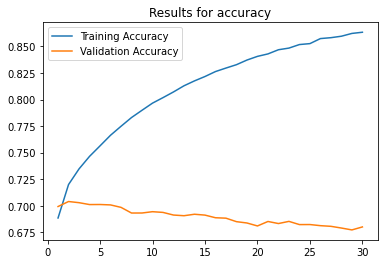

<Figure size 432x288 with 0 Axes>

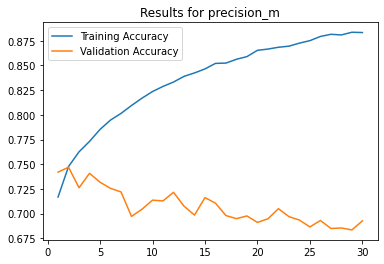

<Figure size 432x288 with 0 Axes>

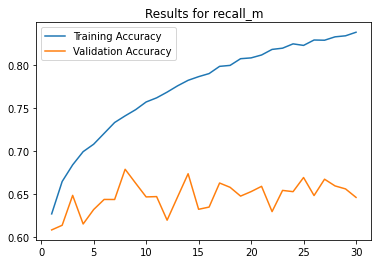

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()
    plt.savefig('fig_rnn_under.png')

In [ ]:
df4_0_over = df4_0.sample(count_class_1, replace=True)
df4_0_over.shape
df4_test_over = pd.concat([df4_0_over, df4_1], axis=0)
print ('Random under-Sampling')
print(df4_test_over.status.value_counts())

Random under-Sampling
1    1537208
0    1537208
Name: status, dtype: int64


In [ ]:
#Read the data in
features = df4_test_over['loan_use']
labels = df4_test_over['status']
labels.value_counts()

1    1537208
0    1537208
Name: status, dtype: int64

In [ ]:
#Spliting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [ ]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
#Use that tokenizer to transform the data in the training 
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [ ]:
# Import the tools needed for keras and define the functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  recall = true_positives / (predicted_positives + K.epsilon())
  return recall

In [ ]:
#Construct a RNN model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          1110784   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,120,193
Trainable params: 1,120,193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [ ]:
history = model.fit(X_train_seq_padded, y_train,
                    batch_size=32, epochs=20,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/20
67253/67253 [==============================] - 377s 6ms/step - loss: 0.5091 - accuracy: 0.7419 - precision_m: 0.7792 - recall_m: 0.6765 - val_loss: 0.4686 - val_accuracy: 0.7697 - val_precision_m: 0.8033 - val_recall_m: 0.7146
Epoch 2/20
67253/67253 [==============================] - 375s 6ms/step - loss: 0.4371 - accuracy: 0.7886 - precision_m: 0.8332 - recall_m: 0.7223 - val_loss: 0.4210 - val_accuracy: 0.7988 - val_precision_m: 0.8445 - val_recall_m: 0.7328
Epoch 3/20
67253/67253 [==============================] - 377s 6ms/step - loss: 0.3941 - accuracy: 0.8131 - precision_m: 0.8615 - recall_m: 0.7465 - val_loss: 0.3934 - val_accuracy: 0.8138 - val_precision_m: 0.8683 - val_recall_m: 0.7401
Epoch 4/20
67253/67253 [==============================] - 377s 6ms/step - loss: 0.3688 - accuracy: 0.8275 - precision_m: 0.8770 - recall_m: 0.7624 - val_loss: 0.3778 - val_accuracy: 0.8235 - val_precision_m: 0.8850 - val_recall_m: 0.7438
Epoch 5/20
67253/67253 [========================

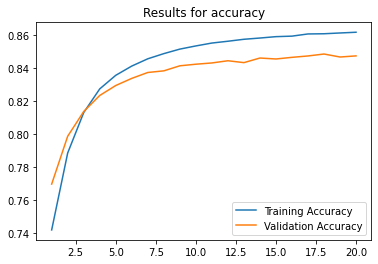

<Figure size 432x288 with 0 Axes>

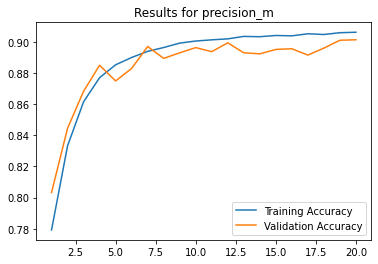

<Figure size 432x288 with 0 Axes>

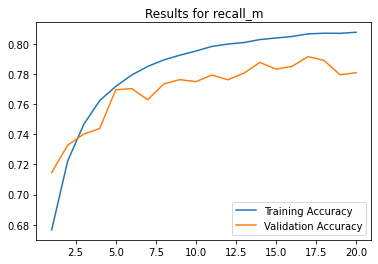

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()
    plt.savefig('fig_rnn_over.png')

In [ ]:
def rnn_model(X_train, y_train, X_test):
  
  #Construct a RNN model
  model = Sequential()
  model.add(Embedding(len(tokenizer.index_word)+1, 32))
  model.add(LSTM(32, dropout=0, recurrent_dropout=0))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # Compile the model
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])
  #validate the model
  history = model.fit(X_train_seq_padded, y_train,
                    batch_size=32, epochs=5,
                    validation_data=(X_test_seq_padded, y_test))
  


In [ ]:
loan_data_cat = loan_data[['sector_name']]
loan_data_cat.nunique()

sector_name    15
dtype: int64

# New Section

In [ ]:
# Create a new column to calculate the average contribution by lenders
dat['contrib_per_lend'] = data['funded_amount'] / data['num_lenders_total']
dat['contrib_per_lend'].value_counts()

25.000000    302126
33.333333     49133
37.500000     35945
50.000000     35508
31.250000     35149
              ...  
74.788136         1
59.548611         1
68.684211         1
26.101695         1
43.842365         1
Name: contrib_per_lend, Length: 19326, dtype: int64

In [ ]:
#Create a new column for the average monthly repayment
dat['monthly_repayment'] = data['funded_amount'] / data['lender_term']
dat['monthly_repayment'].value_counts()

25.000000      69627
50.000000      36566
21.428571      35766
35.714286      35570
28.571429      31103
               ...  
296.666667         1
2191.666667        1
123.500000         1
23.546512          1
181.578947         1
Name: monthly_repayment, Length: 6981, dtype: int64

In [ ]:
#Dropping the columns that are not necessary for the model
data_reduced = dat

In [ ]:
data_reduced.describe(include=object)

In [ ]:
data_reduced.describe()

In [ ]:
 import seaborn as sns
 sns.pairplot(df1[['contrib_per_lend', 'repayment_monthly']])

In [ ]:
data_reduced.columns

In [ ]:
data_reduced.columns = [i.replace(' ', '_').lower() for i in df1.columns]

In [ ]:
data_reduced.isnull().sum()

In [ ]:
data_reduced.loan_amount.value_counts()

In [ ]:
data_reduced.funded_amount.value_counts()

In [ ]:
data_reduced['status'].value_counts()

In [ ]:
data_reduced.info()

In [ ]:
data_reduced.repayment_interval.value_counts()

In [ ]:
data_reduced.lender_term.value_counts()

In [ ]:
# d = data_reduced['loan_name'].value_counts()[0:20]
# d.plot(kind='bar')

In [ ]:
#Create a new column that shows the repayment status( 1 = irregular payment and 0 = payment on time)
data_reduced['repayment_status'] = data_reduced.apply(lambda x: 1 if x['repayment_interval'] =='irregular' else 0, axis=1)

In [ ]:
data_reduced['repayment_status'].value_counts().plot(kind='pie')

In [ ]:
data_reduced.info()

In [ ]:
data_clean = data_reduced[['loan_name', 'funded_amount','loan_amount','currency_exchange_coverage_rate', 'partner_id','lender_term', 'num_journal_entries', 'num_bulk_entries', 'contrib_per_lend','monthly_repayment', 'repayment_status']]


In [ ]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/New Folder/lenders.csv')
df2.head()

In [ ]:
df2.isnull().sum()

In [ ]:
df2.info()

In [ ]:
df1['SECTOR_NAME'].value_counts()